In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re

# Pillow
import PIL
from PIL import Image


In [2]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        # Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [3]:
def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
                if re.match('ad.*', file):
                        images.append(img)
                        labels.append(0)
                elif re.match('unad.*', file):
                        images.append(img)
                        labels.append(1)
        return (np.asarray(images), np.asarray(labels))


In [4]:
maxsize = 100, 100

In [5]:
(train_images, train_labels) = load_image_dataset('C:/Users/Admin/Desktop/train', maxsize)
(test_images, test_labels) = load_image_dataset('C:/Users/Admin/Desktop/test', maxsize)


In [6]:
class_names = ['ad', 'unad']

In [7]:
train_images.shape


(22, 100, 100)

In [8]:
print(train_labels)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
print(train_labels)


[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])


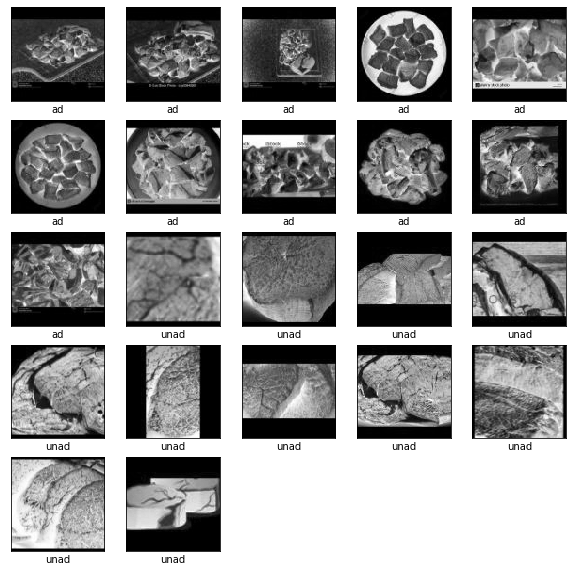

In [11]:
display_images(train_images, train_labels)
plt.show()


In [12]:
train_images.shape

(22, 100, 100)

In [13]:
test_images.shape

(17, 100, 100)

In [14]:
print(test_labels)

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [16]:
# Setting up the layers.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
        keras.layers.Dense(128, activation=tf.nn.sigmoid),
        keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax),
    keras.layers.Flatten()
])


In [17]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)


In [18]:

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
predictions = model.predict(test_images)

In [20]:
model.fit(train_images, train_labels, epochs=100)

Train on 22 samples
Epoch 1/100
22/22 [==============================] - 3s 145ms/sample - loss: 0.6986 - accuracy: 0.4091
Epoch 2/100
22/22 [==============================] - 0s 2ms/sample - loss: 0.6963 - accuracy: 0.5000
Epoch 3/100
22/22 [==============================] - 0s 997us/sample - loss: 0.6938 - accuracy: 0.5000
Epoch 4/100
22/22 [==============================] - 0s 766us/sample - loss: 0.6912 - accuracy: 0.5000
Epoch 5/100
22/22 [==============================] - 0s 1ms/sample - loss: 0.6885 - accuracy: 0.5000
Epoch 6/100
22/22 [==============================] - 0s 669us/sample - loss: 0.6856 - accuracy: 0.5000
Epoch 7/100
22/22 [==============================] - 0s 760us/sample - loss: 0.6826 - accuracy: 0.5000
Epoch 8/100
22/22 [==============================] - 0s 997us/sample - loss: 0.6795 - accuracy: 0.5000
Epoch 9/100
22/22 [==============================] - 0s 917us/sample - loss: 0.6764 - accuracy: 0.5000
Epoch 10/100
22/22 [==============================] - 0s 

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 14ms/sample - loss: 0.6294 - accuracy: 0.8235
Test accuracy: 0.8235294


In [22]:
predictions = model.predict(test_images)


In [23]:
print(predictions)

[[0.5283728  0.47162718]
 [0.5823946  0.41760543]
 [0.49934217 0.5006579 ]
 [0.58341134 0.4165886 ]
 [0.54780835 0.4521917 ]
 [0.5254039  0.47459614]
 [0.6389854  0.36101463]
 [0.598566   0.401434  ]
 [0.44553185 0.55446815]
 [0.46815938 0.5318406 ]
 [0.5764918  0.42350826]
 [0.4509262  0.5490738 ]
 [0.43727812 0.56272185]
 [0.47006184 0.5299382 ]
 [0.48668116 0.5133189 ]
 [0.39409715 0.60590285]
 [0.46460623 0.5353937 ]]


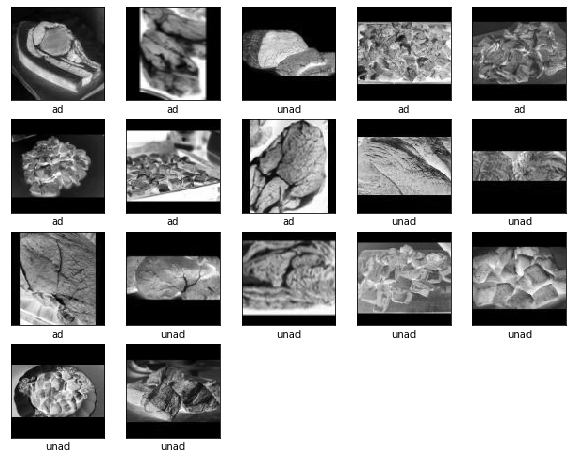

In [24]:
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()